In [1]:
# we are importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Analyisng Logan Paul yotube comment dataset

In [3]:
# we are reading the CSV file with the help of pandas 
df=pd.read_csv('UScomments.csv', on_bad_lines='warn')

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

/var/folders/_f/3nqbl3j17cz7dxy_8jhf9zhr0000gn/T/ipykernel_22692/680725064.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('UScomments.csv', on_bad_lines='warn')


In [4]:
# we are displaying first 10 entries of the file
df.head(10)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

In [5]:
# we will check for missing values in the data
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
# since null values are very less and removal this data will not affect of analysis 
#removing the null values
df.dropna(inplace=True)

In [7]:
# again checking for nul values
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [8]:
#Sentiment Analysis

In [9]:
# installing textblob package for sentiment analysis
!pip install textblob

In [10]:
# we will import TextBlob from textblob library for further sentiment analysis 
from textblob import TextBlob

In [11]:
# for reference lets check the sentiment of very first comment from the data
df.head(3)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   

  replies  
0       0  
1       0  
2       0

In [12]:
#lets check sentiment of 3 comment
TextBlob('Say hi to Kong and maverick for me').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [13]:
# we just want to check the polarity value
TextBlob('Say hi to Kong and maverick for me').sentiment.polarity

0.0

In [14]:
#from above polarity we can see its a neutral statement

In [15]:
# to check shape of data that is (rows , columns)
df.shape

(691374, 4)

In [16]:
#lets check polarity of each comments from our data set using for loop 
#to handle any exception or error lets use try and except method 
polarity=[]
for comments in df['comment_text']:
    try:
        polarity.append(TextBlob(comments).sentiment.polarity)
    except:
        polarity.append(0)

In [17]:
len(polarity)

691374

In [18]:
df["polarity"]=polarity

In [19]:
df.head(10)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  polarity  
0       0  0.000000  
1       0  0.000000  
2       0  0.000000  
3       0  0.000000  
4       0  0.000000  
5       0  0.000000  
6       0  0.000000  
7       0  0.000000  
8       0  0.800000  
9       0 -0.135714

In [20]:
#Wordcloud analysis

In [21]:
# now lets distribute data based on polarity by addding two filters

In [22]:
# for positive comments
filter1=df['polarity']==1

In [23]:
# for negative comments
filter2=df['polarity']==-1

In [24]:
positive_comments=df[filter1]
negative_comments=df[filter2]

In [25]:
positive_comments.head(10)

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   
325  sjlHnJvXdQs                   This is awesome. 1:20 XDDDDDDDDD     0   
416  cMKX2tE5Luk                                 BEST MOVIE EVER!!!     0   
433  cMKX2tE5Luk  Power is the disease.  Care is the cure.  Keep...     0   
447  cMKX2tE5Luk       The greatest movie about the greatest movie.     0   
469  cMKX2tE5Luk         It's Harry guys he's Spiderman best friend     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0  
325       0       1.0  
416       0       1.0  
433       0       1.0  
447       0       1.0  
469       0       1.0

In [26]:
negative_comments.head(10)

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   
1932  -Ifnaxi2LQg          this is the worst thing i've heard. ever.     0   
2043  B7YaMkCl3XA  Economy is horrible in Cuba. It's going to be ...     0   
2088  B7YaMkCl3XA                      Sub to me if this is terrible     0   
2192  5ywKal6-anc                                           PATHETIC     1   
2410  EVp4-qjWVJE  I don't like this sportscaster  sounds very an...     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0  
1932       0      -1.0  
2043       0      -1.0  
2088       1      -1.0  
2192       0      -1.0  
2410       0      -1.0

In [27]:
# lets install wordcloud library
!pip install wordcloud

In [28]:
# lets import wordcloud and stopwords from library
from wordcloud import WordCloud,STOPWORDS

In [29]:
# stopwords will be diplayed and it will be eliminated since it dosemt make any difference
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [30]:
# To perform further wordcloud generation we need comments in string form
#we can see our present comments are in which form
type(df["comment_text"])

pandas.core.series.Series

In [31]:
# it is in series form 
# we need to convert it to string form so we will use join 
total_comments_positive=' '.join(positive_comments['comment_text'])
total_comments_negative=' '.join(negative_comments['comment_text'])

In [32]:
# Lets generate a wordcloud for positive comments 
positive_wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

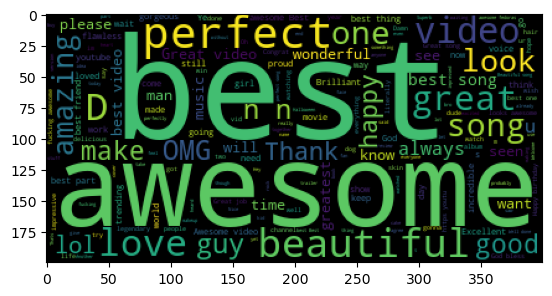

In [33]:
plt.imshow(positive_wordcloud)

(-0.5, 399.5, 199.5, -0.5)

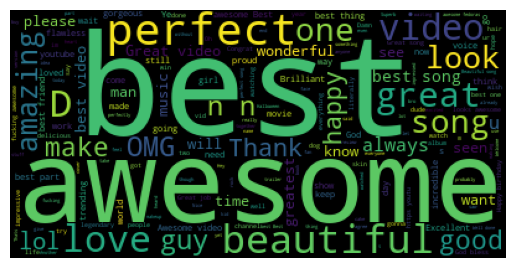

In [34]:
#lets turn off axis
plt.imshow(positive_wordcloud)
plt.axis('off')

In [35]:
# Lets generate a wordcloud for negative comments 
negative_wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

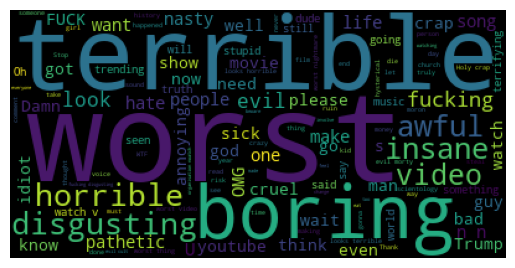

In [36]:
plt.imshow(negative_wordcloud)
plt.axis('off')

In [37]:
# Emoji analysis  

In [38]:
# let us install emoji library to perform emoji analysis
!pip install emoji==2.2.0

In [39]:
# check the emoji version by importing emoji library
import emoji

In [40]:
emoji.__version__

'2.2.0'

In [41]:
df["comment_text"].head(15)

0                     Logan Paul it's yo big day ‼️‼️‼️
1     I've been following you from the start of your...
2                    Say hi to Kong and maverick for me
3                                   MY FAN . attendance
4                                            trending 😉
5                               #1 on trending AYYEEEEE
6                                  The end though 😭👍🏻❤️
7                                  #1 trending!!!!!!!!!
8                           Happy one year vlogaversary
9     You and your shit brother may have single hand...
10               There should be a mini Logan Paul too!
11    Dear Logan, I really wanna get your Merch but ...
12    Honestly Evan is so annoying. Like its not fun...
13                     Casey is still better then logan
14        aw geez rick this guy is the face of YouTube.
Name: comment_text, dtype: object

In [42]:
# let us check the emoji using one comment from dataset let us select comment 6
comment='The end though 😭👍🏻❤️'

In [43]:
for emo in comment:
    if emo in emoji.EMOJI_DATA :
        print(emo)

😭
👍
🏻
❤


In [44]:
# let us perform it on our original data set
all_emojis=[]
for comment in df["comment_text"]:
    for emo in comment:
        if emo in emoji.EMOJI_DATA :
            all_emojis.append(emo)

In [45]:
# let us see some emojis in our emoji list
all_emojis[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [46]:
# we need to count of emojis how many times the appeared 
# we will import a counter
from collections import Counter

In [47]:
Counter(all_emojis).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [48]:
# for emoji
emoji=[]
for i in range(10):
    j=Counter(all_emojis).most_common(10)[i][0]
    emoji.append(j)
print(emoji)

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']


In [49]:
# for emoji frequency
freq=[]
for i in range(10):
    j=Counter(all_emojis).most_common(10)[i][1]
    freq.append(j)
print(freq)

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]


<function matplotlib.pyplot.show(close=None, block=None)>

/Users/admin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
/Users/admin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/admin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/admin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  func(*args, **kwargs)
/Users/admin/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  func(*args, **kwargs)
/Users/admin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) mi

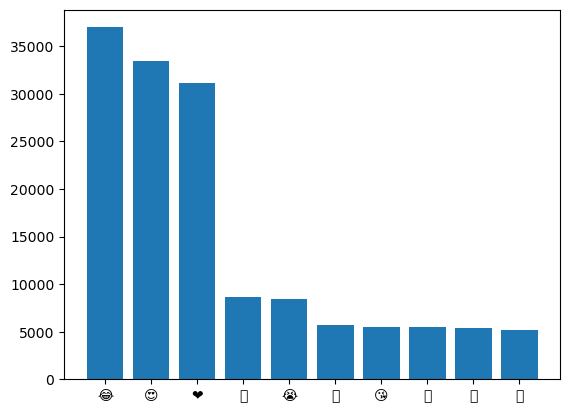

In [50]:
# plot the graph for it 
plt.bar(emoji,freq)
plt.show

In [51]:
# let us plot a graph using plotly for a better appearence
import plotly.graph_objs as go
from plotly.offline import iplot

In [52]:
my_graph=go.Bar(x=emoji,y=freq)

In [53]:
iplot([my_graph])

In [54]:
# Analysing Youtube data stored in locally 

In [55]:
# importing os library to access files from local machine storage 
import os

In [56]:
# accessing all files 
all_files=os.listdir(r'/Users/admin/Downloads/project material/additional_data')

In [57]:
# storing only CSV files which are of our use
files=[]
for i in all_files :
    if '.csv' in i:
        files.append(i)

In [58]:
files

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [59]:
# now let us concatenate all the datasets using pandas
all_df=pd.DataFrame()
path=r'/Users/admin/Downloads/project material/additional_data'

In [60]:
for i in files:
    present_df=pd.read_csv(path+'/'+i,encoding="iso-8859-1",on_bad_lines='warn')
    all_df=pd.concat([all_df,present_df],ignore_index=True)

In [61]:
all_df.head(10)

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   
5  Q9kK6NWZR1U      17.14.11   
6  c9VTD3n_IDs      17.14.11   
7  XzULSsZYMRc      17.14.11   
8  uijjYNtl_UM      17.14.11   
9  cOJ68MQm2ac      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   
5  Asi se sintio Terremoto en iraq al bordo de ir...   
6  La Resolana con el Capi | Programa 12 noviembr...   
7  M6.7 Costa Rica AnÃ¡lisis de Terremotos en (((...   
8  7 NiÃ±os Famosos Que No Supieron Adaptarse a L...   
9  TOP: Los 7 libros infantiles mÃ¡s perturbadore...   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   
5  MÃSICA & ENTRETENIMIENTO           10  2017-11-12T20:17:38.000Z   
6                La Resolana           22  2017-11-13T07:00:03.000Z   
7            concienciaradio           25  2017-11-13T06:18:23.000Z   
8         Los mejores Top 10           24  2017-11-12T19:54:12.000Z   
9               DrossRotzank           24  2017-11-12T21:14:44.000Z   

                                                tags    views  likes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...   310130   4182   
1                                    La Voz Mexico 7   104972    271   
2  Chumel Torres|"El Pulso de la Republica"|"noti...   136064  10105   
3         temblor|"costa rica"|"sismo en costa rica"    96153    378   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...   499965  57781   
5                                             [none]   129645    506   
6  la resolana|"la resolana con el capi"|"tv azte...    75197   2277   
7  terremoto|"costa rica"|"nicaragua"|"alex backm...   142522   7745   
8  los mejores top 10|"top 10 niÃ±os"|"top 10"|"t...   371110  20155   
9  libros infantiles|"Dross"|"terror"|"horror"|"m...  1111314  83582   

   dislikes  comment_count                                  thumbnail_link  \
0       361           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1       174            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2       266            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3       171            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4       681           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   
5        67            239  https://i.ytimg.com/vi/Q9kK6NWZR1U/default.jpg   
6        69            164  https://i.ytimg.com/vi/c9VTD3n_IDs/default.jpg   
7       659              0  https://i.ytimg.com/vi/XzULSsZYMRc/default.jpg   
8       912            766  https://i.ytimg.com/vi/uijjYNtl_UM/default.jpg   
9      2194           9106  https://i.ytimg.com/vi/cOJ68MQm2ac/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   
5              False             False                   False   
6              False             False                   False   
7               True             False                   False   
8       

In [62]:
#total rows in our datset
all_df.shape

(375942, 16)

In [63]:
# let us check for the duplicates in our dataset created 
#total duplicates in our dataset
all_df[all_df.duplicated()].shape

(36417, 16)

In [64]:
# let us remove duplicates and check the final count of rows
all_df=all_df.drop_duplicates()
all_df.shape

(339525, 16)

In [65]:
# let us export the data to csv file and store it in our local machine
all_df[0:500].to_csv(r"/Users/admin/Downloads/project material/my_exported/youtube_data1.csv",index=False)
#importing only 500 because to its a huge dataset

In [66]:
# analysing which category has maximum likes in the dataset

In [67]:
# Let us get the unique category ID from the dataset
all_df['category_id'].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [68]:
# since we don't have category column in dataset
# lets read a json file where category id and corresponding category name is stored
df_json=pd.read_json(r"/Users/admin/Downloads/project material/additional_data/US_category_id.json")

In [69]:
df_json

kind  \
0   youtube#videoCategoryListResponse   
1   youtube#videoCategoryListResponse   
2   youtube#videoCategoryListResponse   
3   youtube#videoCategoryListResponse   
4   youtube#videoCategoryListResponse   
5   youtube#videoCategoryListResponse   
6   youtube#videoCategoryListResponse   
7   youtube#videoCategoryListResponse   
8   youtube#videoCategoryListResponse   
9   youtube#videoCategoryListResponse   
10  youtube#videoCategoryListResponse   
11  youtube#videoCategoryListResponse   
12  youtube#videoCategoryListResponse   
13  youtube#videoCategoryListResponse   
14  youtube#videoCategoryListResponse   
15  youtube#videoCategoryListResponse   
16  youtube#videoCategoryListResponse   
17  youtube#videoCategoryListResponse   
18  youtube#videoCategoryListResponse   
19  youtube#videoCategoryListResponse   
20  youtube#videoCategoryListResponse   
21  youtube#videoCategoryListResponse   
22  youtube#videoCategoryListResponse   
23  youtube#videoCategoryListResponse   
24  youtube#videoCategoryListResponse   
25  youtube#videoCategoryListResponse   
26  youtube#videoCategoryListResponse   
27  youtube#videoCategoryListResponse   
28  youtube#videoCategoryListResponse   
29  youtube#videoCategoryListResponse   
30  youtube#videoCategoryListResponse   
31  youtube#videoCategoryListResponse   

                                                 etag  \
0   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
5   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
6   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
7   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
8   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
9   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
10  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
11  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
12  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
13  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
14  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
15  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
16  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
17  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
18  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
19  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
20  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
21  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
22  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
23  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
24  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
25  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
26  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
27  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
28  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
29  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
30  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
31  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                                items  
0   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
5   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
6   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
7   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
8   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
9   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
10  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
11  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
12  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
13  {'kind': 

In [70]:
# As we can see items are stored in key value pair let us access it
df_json["items"].head(10)

0    {'kind': 'youtube#videoCategory', 'etag': '"m2...
1    {'kind': 'youtube#videoCategory', 'etag': '"m2...
2    {'kind': 'youtube#videoCategory', 'etag': '"m2...
3    {'kind': 'youtube#videoCategory', 'etag': '"m2...
4    {'kind': 'youtube#videoCategory', 'etag': '"m2...
5    {'kind': 'youtube#videoCategory', 'etag': '"m2...
6    {'kind': 'youtube#videoCategory', 'etag': '"m2...
7    {'kind': 'youtube#videoCategory', 'etag': '"m2...
8    {'kind': 'youtube#videoCategory', 'etag': '"m2...
9    {'kind': 'youtube#videoCategory', 'etag': '"m2...
Name: items, dtype: object

In [71]:
df_json["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [72]:
# we can see there is a id and corresponding category for it 
# now we need a dictionary where we can store id as key and category (title) as value

In [73]:
category_dict={}
for i in df_json['items'].values:# as values is given it will show it as array
    category_dict[int(i['id'])]=i['snippet']['title']

In [74]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [75]:
# Now we have the category id and category name let us map it in our dataset
all_df['category_name']=all_df['category_id'].map(category_dict)

In [76]:
all_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')

In [77]:
# we can see category_name column is updated

In [78]:
all_df.head(3)

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description    category_name  
0  Disfruta la presencia del Chef Torreblanca en ...    Entertainment  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   People & Blogs  
2  La canciÃ³n del principio se llama âEste esp...  News & Politics

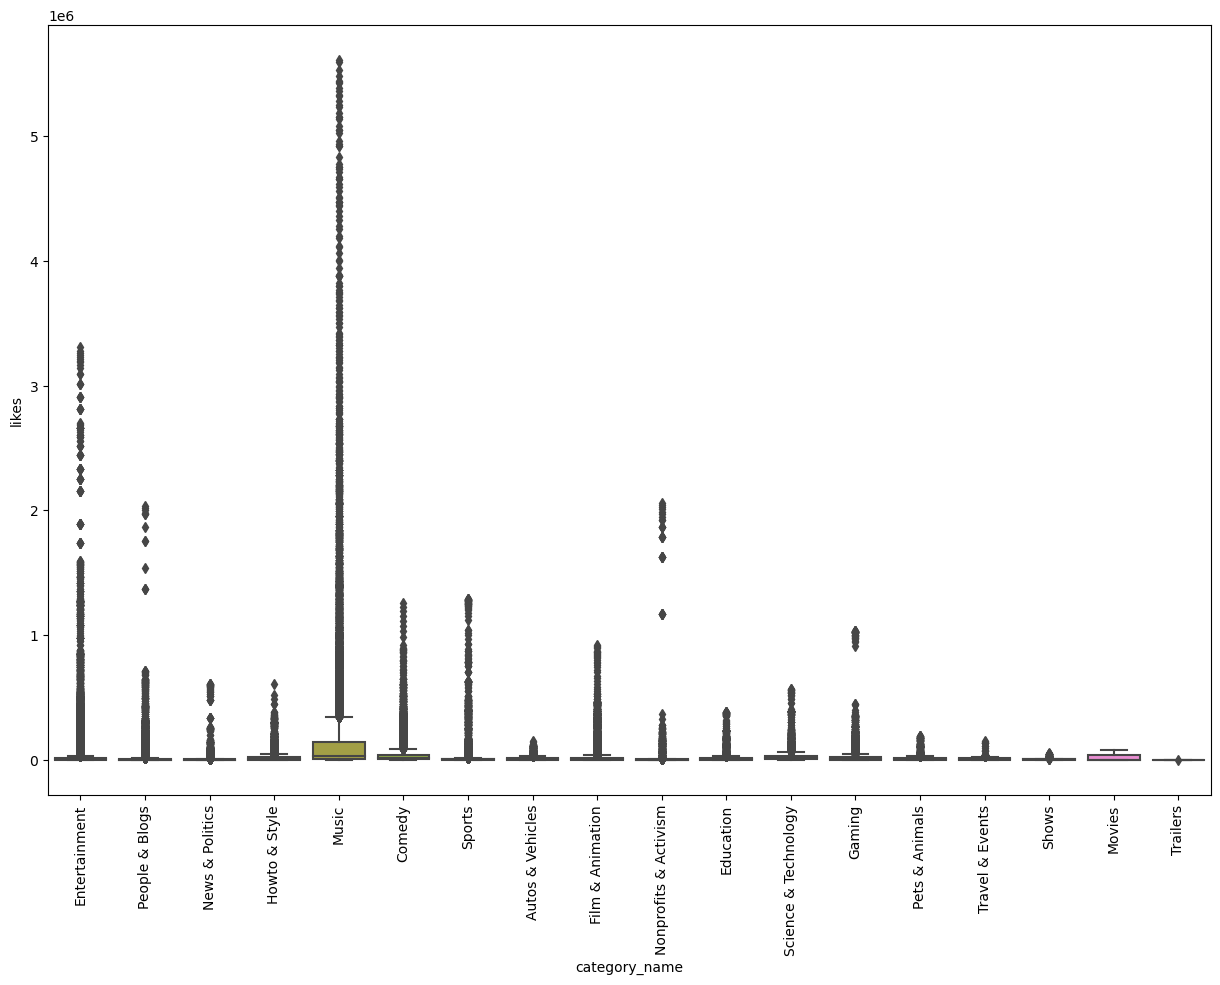

In [91]:
plt.figure(figsize=(15,10))
sns.boxplot(x='category_name',y='likes',data=all_df)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
# Let us analyse the whether audience are engaged or not
#lets see the like rate 
all_df['like_rate']=(all_df['likes']/all_df['views'])*100

In [84]:
#lets see the dislike rate 
all_df['dislike_rate']=(all_df['dislikes']/all_df['views'])*100

In [86]:
#lets see the comment count rate 
all_df['comment_count_rate']=(all_df['comment_count']/all_df['views'])*100

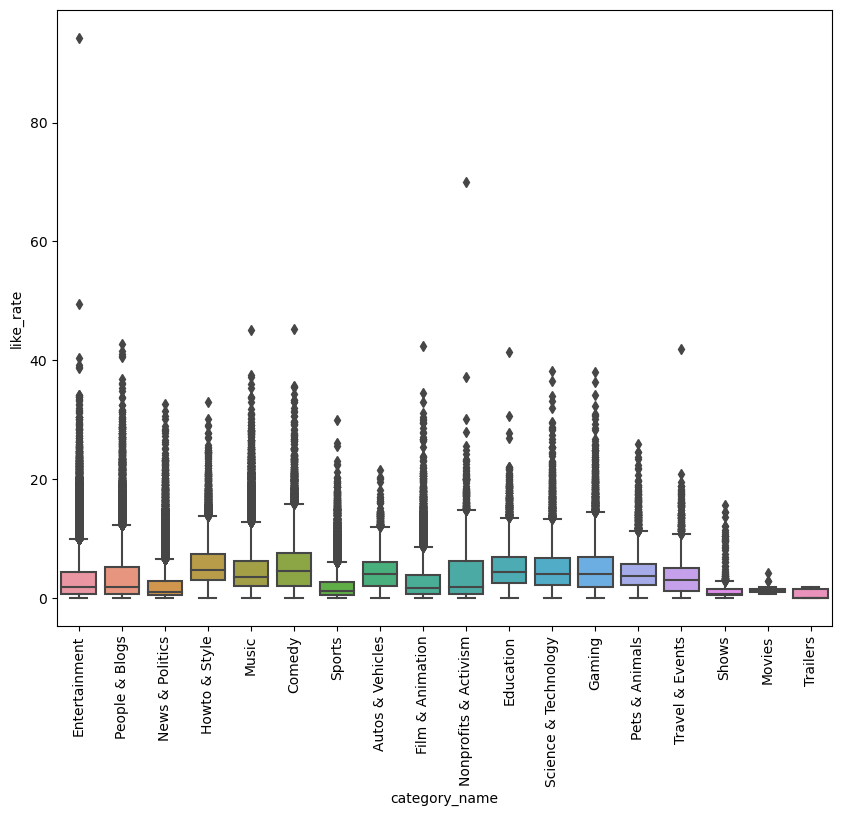

In [97]:
#lets create a boxplot for like rate associated with category
plt.figure(figsize=(10,8))
sns.boxplot(x='category_name',y='like_rate',data=all_df)
plt.xticks(rotation='vertical')
plt.show()

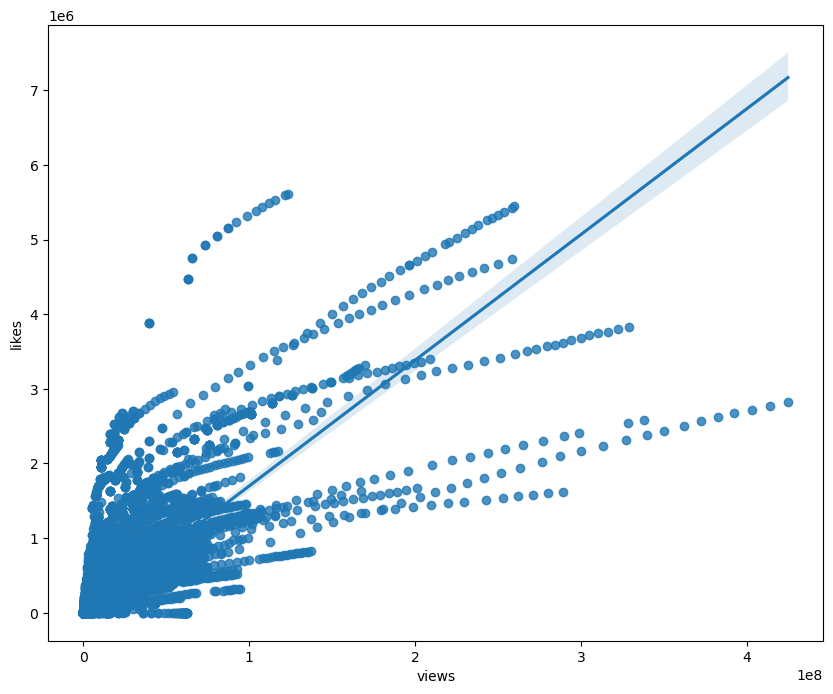

In [99]:
# lets plot a regression plot between likes and view 
# regression plot is a combination of scatter plot and a regression line on top of it
plt.figure(figsize=(10,8))
sns.regplot(x='views',y='likes',data=all_df)
plt.show()

In [ ]:
# as we can see there is straight line it means as views increase likes will also incerase 

In [104]:
# lets check the corelation between likes , dislikes and views
cor_table=all_df[['views','dislikes','likes']].corr()
cor_table

views  dislikes     likes
views     1.000000  0.405428  0.779531
dislikes  0.405428  1.000000  0.451809
likes     0.779531  0.451809  1.000000

In [ ]:
# from the above table we can see that if views increase by 1 unit then dislikes will increse by 0.4 and
#likes will increase by 0.7 units

<Axes: >

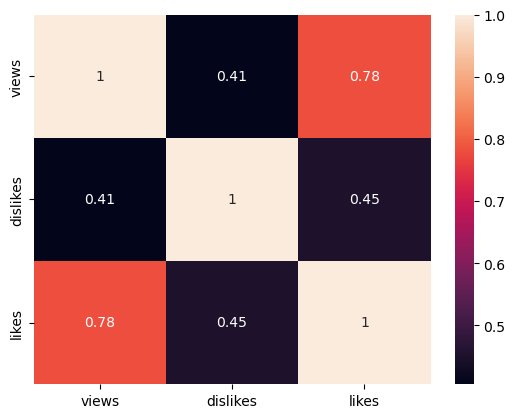

In [106]:
# lets plot this correlation using heatmap
sns.heatmap(cor_table,annot=True)

In [ ]:
# Trending Video Analysis


In [107]:
# lets check which channel has more trending videos
# let us check how many channels are there in the dataset
all_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
ABIZ ENT BUZZ                           1
JENNYMOMENT                             1
Drache Offiziell                        1
Jules                                   1
The Chainsmokers                        1
Name: count, Length: 37824, dtype: int64

In [114]:
# we can perform same count of channel using group by 
chanel_data=all_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
chanel_data

channel_title    0
0      The Late Show with Stephen Colbert  710
1                                     WWE  643
2             Late Night with Seth Meyers  592
3                            TheEllenShow  555
4                       Jimmy Kimmel Live  528
...                                   ...  ...
37819                            Kd Malts    1
37820                            Zedan TV    1
37821            Kc Kelly - Rocketprenuer    1
37822                               Kbaby    1
37823                    Pavel Sidorik TV    1

[37824 rows x 2 columns]

In [117]:
# let us rename the column with video count
chanel_data=chanel_data.rename(columns={0:'total_vid'})
chanel_data

channel_title  total_vid
0      The Late Show with Stephen Colbert        710
1                                     WWE        643
2             Late Night with Seth Meyers        592
3                            TheEllenShow        555
4                       Jimmy Kimmel Live        528
...                                   ...        ...
37819                            Kd Malts          1
37820                            Zedan TV          1
37821            Kc Kelly - Rocketprenuer          1
37822                               Kbaby          1
37823                    Pavel Sidorik TV          1

[37824 rows x 2 columns]

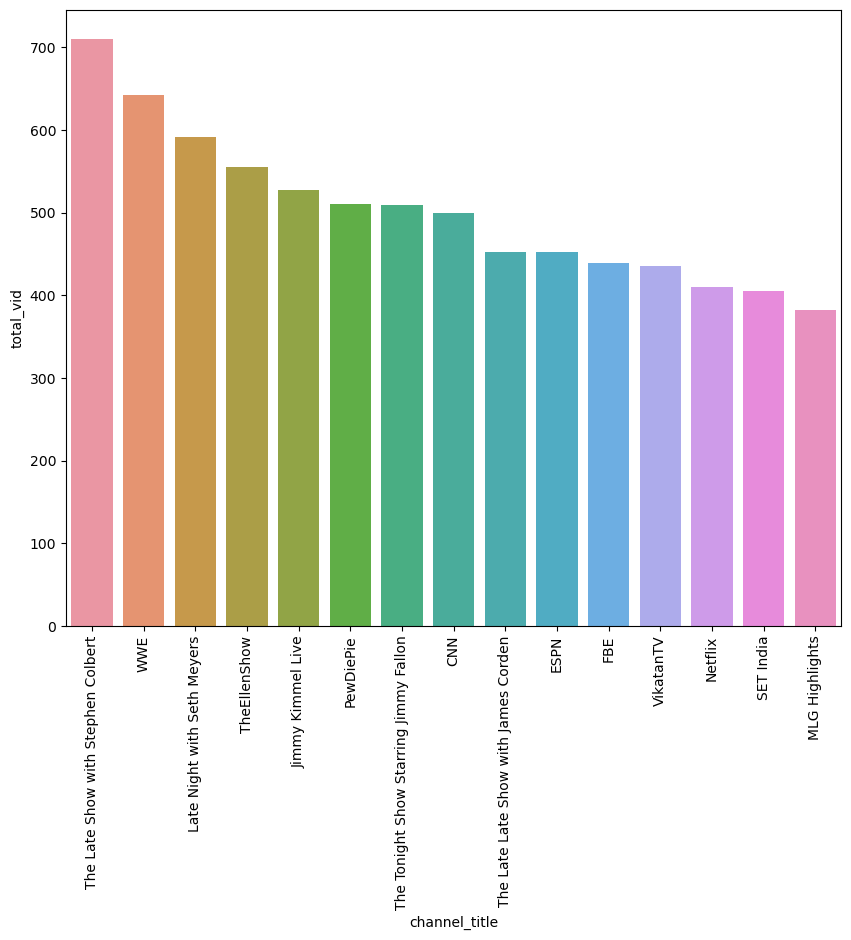

In [124]:
# let us plot the graph for it ,since there is lot of data and we have to see top trending videos
# let us build a graph for top 15 datasets
x_data=chanel_data.head(15)
plt.figure(figsize=(10,8))
sns.barplot(x='channel_title',y='total_vid',data=x_data)
plt.xticks(rotation='vertical')
plt.show()

In [125]:
# let us analyse whether punctuations in title and tags have any relation with comments,views,likes and dislikes 

In [131]:
# let us see what is punctutation
# let us import a library for punctuation
import string 

In [132]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# above shown are punctuation

In [149]:
# let us see how many punctuation are there in entry 2 from dataset
punc_char=[]
for i in all_df['title'][2]:
    if i in string.punctuation:
        punc_char.append(i)
print(all_df['title'][2])
print(punc_char,"\n",len(punc_char))

LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA
['-'] 
 1


In [150]:
# let us craete a function for it 
def punc_count(punc_text):
    char=[]
    for i in punc_text:
        if i in string.punctuation:
            char.append(i)
    punc_char_count=len(char)
    return punc_char_count

In [142]:
# since data is vast to understand lets us take sample of 1000 entries 
sample_all_df=all_df.head(1000)
sample_all_df.shape

(1000, 20)

In [151]:
sample_all_df['count_punc']=sample_all_df['title'].apply(punc_count)

/var/folders/_f/3nqbl3j17cz7dxy_8jhf9zhr0000gn/T/ipykernel_22692/141908071.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



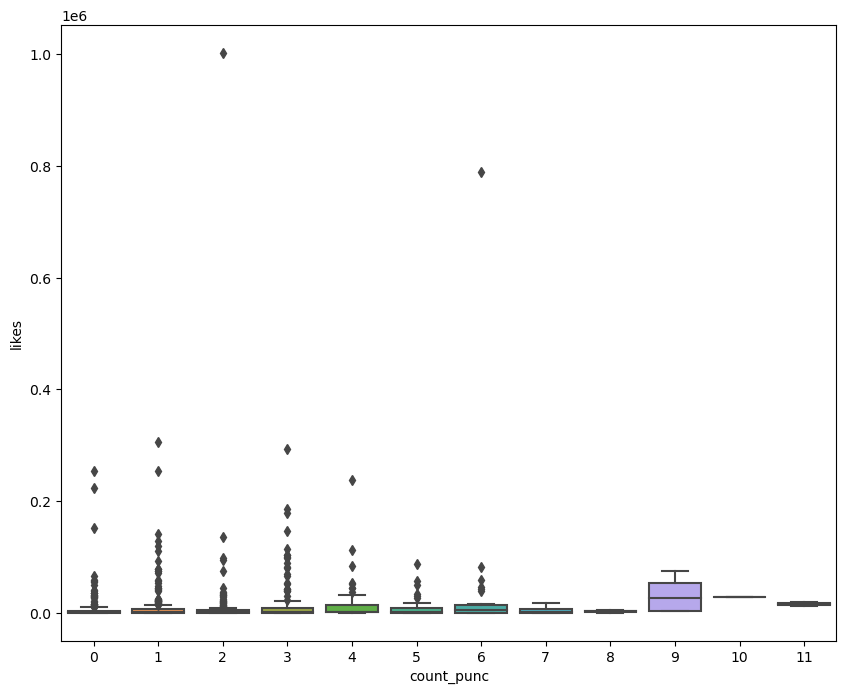

In [159]:
# let us plot a box plot between views and punctuation count
plt.figure(figsize=(10,8))
sns.boxplot(x='count_punc',y='likes',data=sample_all_df)
plt.show()

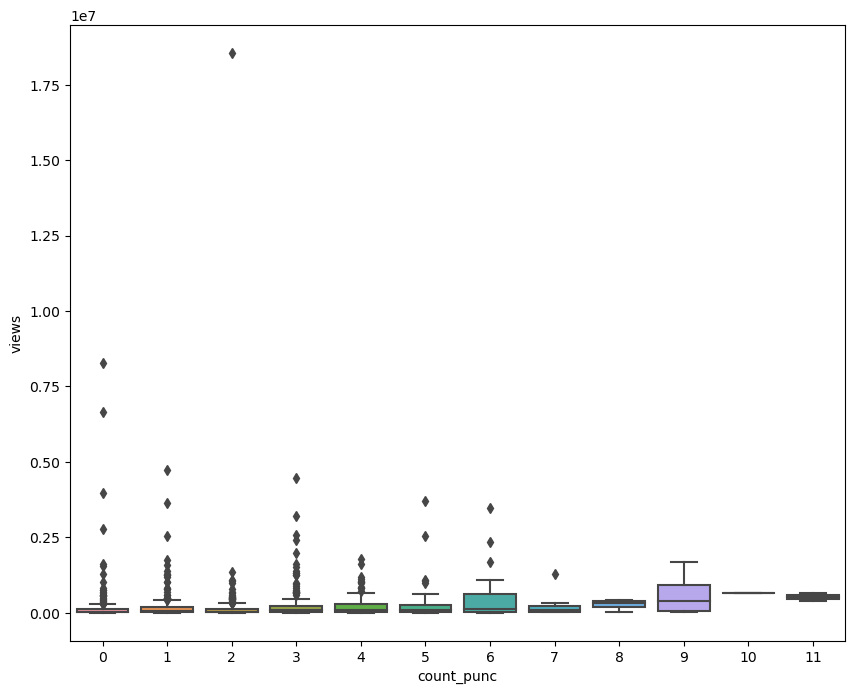

In [162]:
# let us plot a box plot between views and punctuation count 
plt.figure(figsize=(10,8))
sns.boxplot(x='count_punc',y='views',data=sample_all_df)
plt.show()